In [17]:
#Dependencies
import requests
import json
from api_keys import api_key_FBI
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from pathlib import Path



In [18]:
# the abbreviation of every state.
state_codes = pd.DataFrame({"Abbreviation":['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT',"DC",
                'DE', 'FL',"FS", 'GA',"GM", 'HI', 'IA',"ID", 'IL', 'IN',
                'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 
                'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 
                'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 
                'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 
                'TX', 'UT', 'VT', 'VA', 'WA', "VI",'WV', 'WI', 'WY']})

data_homicide=state_codes.copy()
data_homicide["Total Homicide"]=""
data_homicide.head()



,Abbreviation,Total Homicide
0,AL,
1,AK,
2,AZ,
3,AR,
4,CA,


# INFORMATION OF FBI HOMICIDE OF 2021

In [21]:
for index,row in data_homicide.iterrows():
    try:
        #with this we get the information of FBI API
        state=row["Abbreviation"]
        base_url=f"https://api.usa.gov/crime/fbi/cde/shr/state/{state}/victim/sex?from=2021&to=2021&API_KEY={api_key_FBI}"
        #print(base_url)
        response = requests.get(base_url)
        response= response.json()

        data_homicide.loc[index,"Total Homicide"]=response["data"][0]["Unknown"]+response["data"][0]["Male"]+response["data"][0]["Female"]
    except:
        data_homicide.loc[index, "Total Homicide"] = None


data_homicide.head(54)
# List all 54 states in order showing the number of total Homicides   


,Abbreviation,Total Homicide
0,AL,309
1,AK,18
2,AZ,190
3,AR,321
4,CA,123
5,CO,358
6,CT,148
7,DC,109
8,DE,94
9,FL,None


In [22]:
data_homicide= data_homicide.dropna(how = "any")
data_homicide["Total Homicide"] = data_homicide["Total Homicide"].astype(int)
data_homicide = data_homicide.sort_values("Total Homicide")
data_homicide.head(50)

,Abbreviation,Total Homicide
13,HI,6
47,VT,8
31,NH,14
36,ND,14
53,WY,17
1,AK,18
21,ME,18
43,SD,26
28,MT,31
15,ID,36


In [23]:
# want to get the statistical overview?
data_homicide.describe()

,Total Homicide
count,49.00000
mean,297.77551
std,354.79444
min,6.00000
25%,85.00000
50%,169.00000
75%,438.00000
max,2064.00000


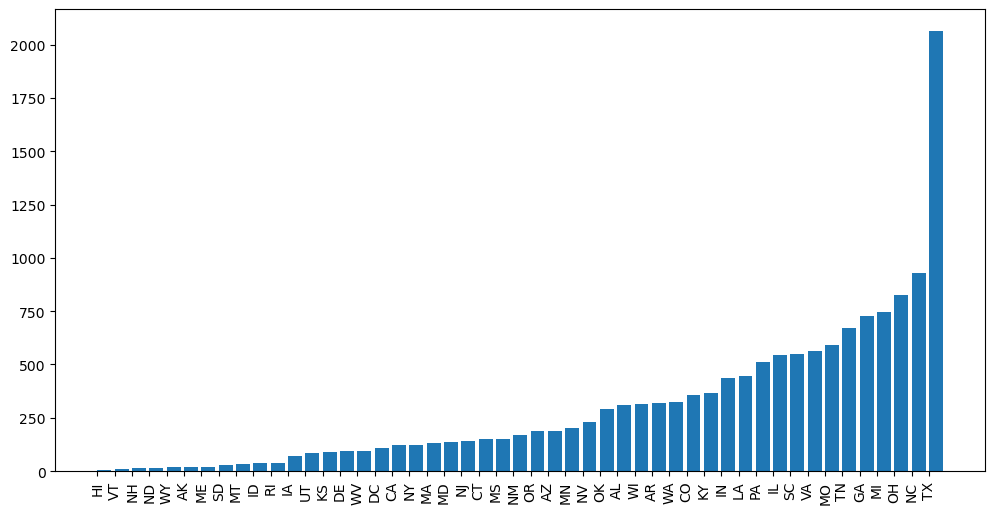

In [24]:
# Generate a bar plot showing the total number of rows 
plt.figure(figsize=(12, 6))
plt.bar(data_homicide["Abbreviation"], data_homicide["Total Homicide"], align = "edge")
plt.xticks(rotation = 90)
plt.show()

In [19]:
# Read in the census data
census_path = Path("Resources/census_data.csv")
census_df = pd.read_csv(census_path)
census_df.head(51)

,Abbreviation,State,Population
0,AL,Alabama,5039877
1,AK,Alaska,732673
2,AZ,Arizona,7276316
3,AR,Arkansas,3025891
4,CA,California,39237836
5,CO,Colorado,5812069
6,CT,Connecticut,3605597
7,DE,Delaware,1003384
8,DC,District of Columbia,670050
9,FL,Florida,21781128


In [25]:
# Merge with homicide data
homicide_plus_census = pd.merge(data_homicide, census_df, on = "Abbreviation", how = "inner", 
                    left_index=False, right_index=False)
homicide_plus_census["Population"] = homicide_plus_census["Population"].astype(int)
homicide_plus_census.head()

,Abbreviation,Total Homicide,State,Population
0,HI,6,Hawaii,1441553
1,VT,8,Vermont,645570
2,NH,14,New Hampshire,1388992
3,ND,14,North Dakota,774948
4,WY,17,Wyoming,578803


In [26]:
# Find the homicide rate per 100,000
homicide_plus_census["Homicide Rate (per 100,000)"] = (homicide_plus_census["Total Homicide"] / 
                                                        homicide_plus_census["Population"]) * 100000
homicide_plus_census.head(51)

,Abbreviation,Total Homicide,State,Population,"Homicide Rate (per 100,000)"
0,HI,6,Hawaii,1441553,0.416218
1,VT,8,Vermont,645570,1.239215
2,NH,14,New Hampshire,1388992,1.007925
3,ND,14,North Dakota,774948,1.806573
4,WY,17,Wyoming,578803,2.937096
5,AK,18,Alaska,732673,2.456758
6,ME,18,Maine,1372247,1.311717
7,SD,26,South Dakota,895376,2.903808
8,MT,31,Montana,1104271,2.807282
9,ID,36,Idaho,1900923,1.893817


In [27]:
# Sort by Homicide Rate
homicide_rate_df = homicide_plus_census.sort_values("Homicide Rate (per 100,000)")
homicide_rate_df.head()

,Abbreviation,Total Homicide,State,Population,"Homicide Rate (per 100,000)"
17,CA,123,California,39237836,0.313473
0,HI,6,Hawaii,1441553,0.416218
18,NY,124,New York,19835913,0.625129
2,NH,14,New Hampshire,1388992,1.007925
1,VT,8,Vermont,645570,1.239215


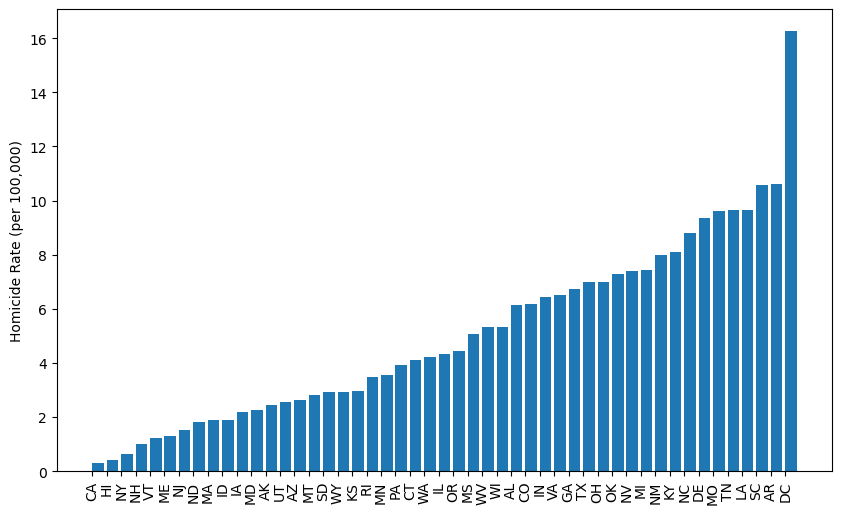

In [28]:
# Plot homicide rate for each state
plt.figure(figsize = (10, 6))
plt.bar(homicide_rate_df["Abbreviation"], homicide_rate_df["Homicide Rate (per 100,000)"], align = "edge")
plt.ylabel("Homicide Rate (per 100,000)")
plt.xticks(rotation = 90)
plt.show()

In [30]:
# Statistical Overview
homicide_rate_df["Homicide Rate (per 100,000)"].describe()

count    49.000000
mean      5.061576
std       3.376417
min       0.313473
25%       2.456758
50%       4.308893
75%       7.274298
max      16.267443
Name: Homicide Rate (per 100,000), dtype: float64

# INFORMATION OF COST LIVING

In [52]:
cost_living_data = pd.read_csv("resources/cost-of-living-index-by-state-[updated-june-2023].csv")

# Create a new DataFrame with the desired columns
cost_of_living = cost_living_data.loc[:, ["state", "2023", "GroceryCostsIndex", "HousingCostsIndex", "MiscCostsIndex", "TransportationCostsIndex", "UtilityCostsIndex"]]

# Rename the columns "2023" and "state" to "Rank" and "State" respectively
cost_of_living.rename(columns={"2023": "Cost of Living Index", "state": "State"}, inplace=True)

# Display the new table
cost_of_living.head()

,State,Cost of Living Index,GroceryCostsIndex,HousingCostsIndex,MiscCostsIndex,TransportationCostsIndex,UtilityCostsIndex
0,Hawaii,179.0,125.6,309.7,123.8,140.3,141.1
1,District of Columbia,148.7,106.9,241.8,117.7,107.9,110.2
2,Massachusetts,148.4,105.0,219.5,125.8,127.5,126.1
3,California,134.5,112.3,186.5,110.9,124.1,124.8
4,New York,125.1,103.0,173.3,109.0,106.7,102.5


In [36]:
# Statistical Summary
cost_of_living.describe()

,Cost of Living Index,GroceryCostsIndex,HousingCostsIndex,MiscCostsIndex,TransportationCostsIndex,UtilityCostsIndex
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,104.001961,101.215686,109.049020,102.476471,102.611765,101.741176
std,18.240970,6.569395,46.903677,8.790531,10.902012,14.026406
min,85.300000,93.800000,68.000000,91.000000,88.300000,84.400000
25%,91.750000,97.300000,79.300000,96.250000,95.050000,92.700000
50%,96.500000,100.100000,92.100000,99.600000,99.400000,97.800000
75%,112.300000,103.000000,118.500000,106.450000,108.050000,106.550000
max,179.000000,127.400000,309.700000,125.800000,140.300000,148.100000


# INFORMATION of HEALTH COST

In [48]:
states_USA=pd.read_csv("resources/states.csv")
healthcare=pd.merge(states_USA,health_data[["Score","State"]],on="State",how="inner")
healthcare = healthcare.rename(columns ={"Score": "Healthcare Score"})
healthcare.head()

,State,Abbreviation,Healthcare Score
0,Alabama,AL,49.21
1,Alaska,AK,64.97
2,Arizona,AZ,63.05
3,Arkansas,AR,42.03
4,California,CA,43.26


In [62]:
# Change the healthcare score so that lower values are better to match the other two variables.
healthcare["Healthcare Score"] = 100 - healthcare["Healthcare Score"]
# Sort the DataFrame in ascending order based on the "Healthcare Score" column (least to greatest)
sorted_healthcare = healthcare.sort_values(by="Healthcare Score", ascending=True)
sorted_healthcare = sorted_healthcare.reset_index(drop = True)

# Display the first 54 rows of the sorted DataFrame
sorted_healthcare

,State,Abbreviation,Healthcare Score
0,South Dakota,SD,0.00
1,Louisiana,LA,13.31
2,West Virginia,WV,17.69
3,Florida,FL,20.49
4,Wyoming,WY,21.37
5,Nebraska,NE,24.87
6,Maine,ME,25.92
7,Delaware,DE,26.09
8,New Hampshire,NH,30.47
9,Oklahoma,OK,30.65


# Combined Data

In [63]:
# Merge homicide rate and healthcare cost dataframes
healthcare_homicide = pd.merge(homicide_rate_df, healthcare, on = ["State", "Abbreviation"], how = "inner")


In [66]:
# Merge cost of living with above dataframe
final_data = pd.merge(healthcare_homicide, cost_of_living[["State", "Cost of Living Index"]], on ="State")
final_data= final_data[["Abbreviation", "State", "Homicide Rate (per 100,000)", "Healthcare Score", "Cost of Living Index"]]
final_data.head()

,Abbreviation,State,"Homicide Rate (per 100,000)",Healthcare Score,Cost of Living Index
0,CA,California,0.313473,56.74,134.5
1,HI,Hawaii,0.416218,78.81,179.0
2,NY,New York,0.625129,32.75,125.1
3,NH,New Hampshire,1.007925,30.47,115.0
4,VT,Vermont,1.239215,56.22,114.9


In [112]:
final_data.to_csv("final_data.csv",index_label="State")

# Plotting

#### Bar Plots

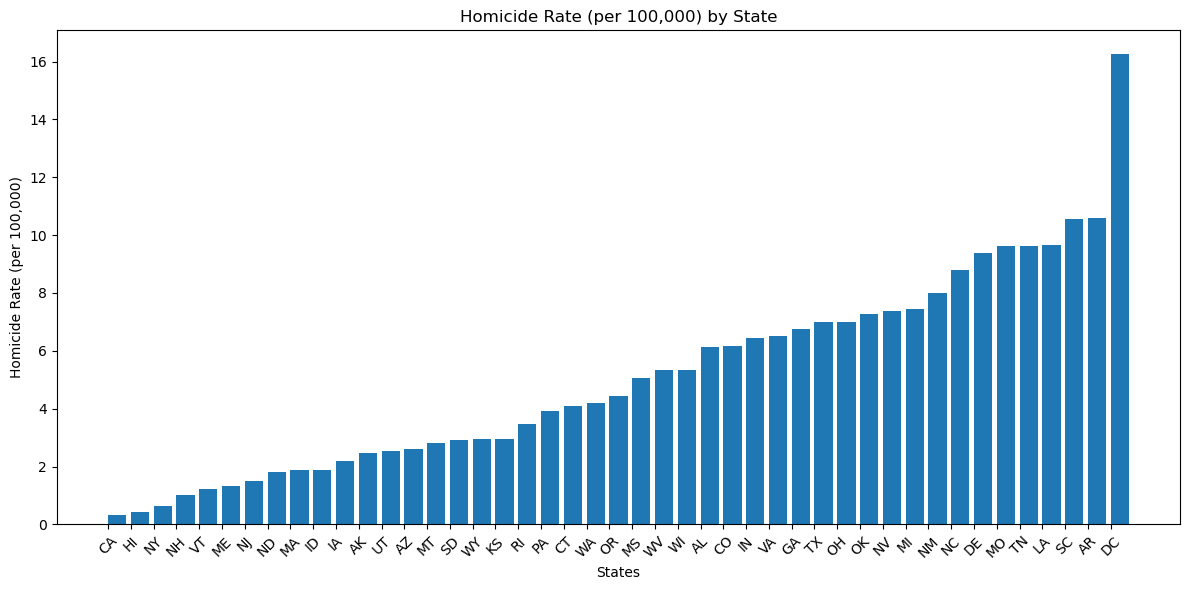

In [67]:
# Generate a bar plot showing the total number of rows 
plt.figure(figsize=(12,6))
plt.bar(final_data["Abbreviation"],final_data["Homicide Rate (per 100,000)"],align="edge",)

plt.xlabel('States')
plt.ylabel('Homicide Rate (per 100,000)')
plt.title('Homicide Rate (per 100,000) by State')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plots/HomBar.png")
plt.show()

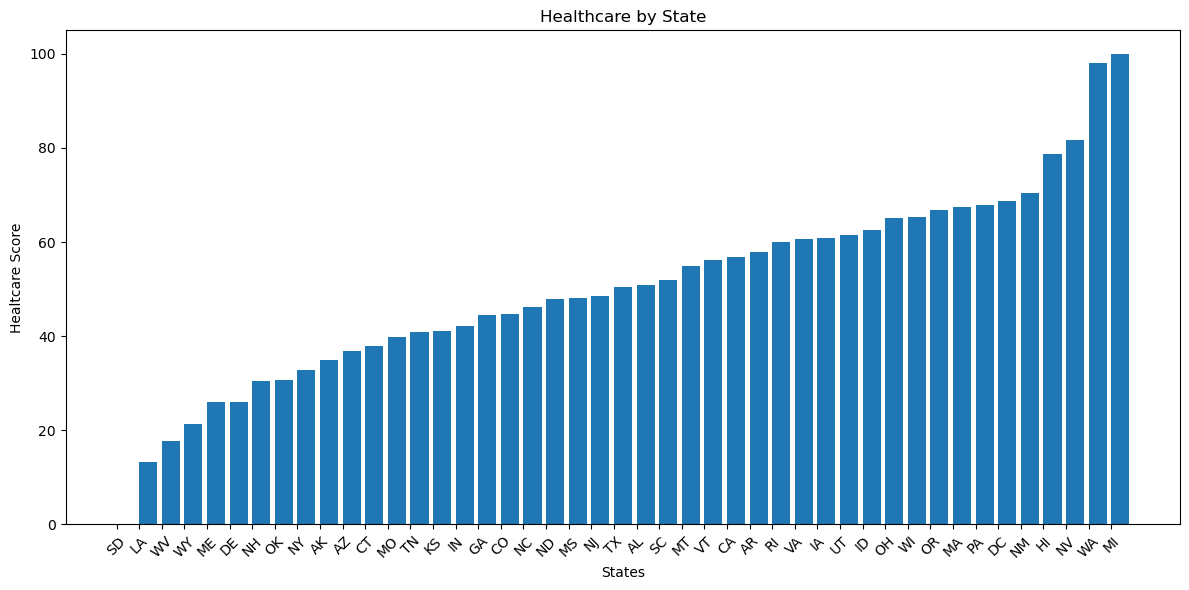

In [69]:
# Sort data by Healthcare Score
final_data_sorted_healthcare = final_data.sort_values("Healthcare Score", ascending = True)
# Generate a bar plot showing Healthcare Score by state
plt.figure(figsize=(12,6))
plt.bar(final_data_sorted_healthcare["Abbreviation"],final_data_sorted_healthcare["Healthcare Score"],align="edge",)

plt.xlabel('States')
plt.ylabel('Healtcare Score')
plt.title("Healthcare by State")

plt.xticks(rotation=45)
plt.savefig("plots/HealthBar.png")
plt.tight_layout()
plt.show()

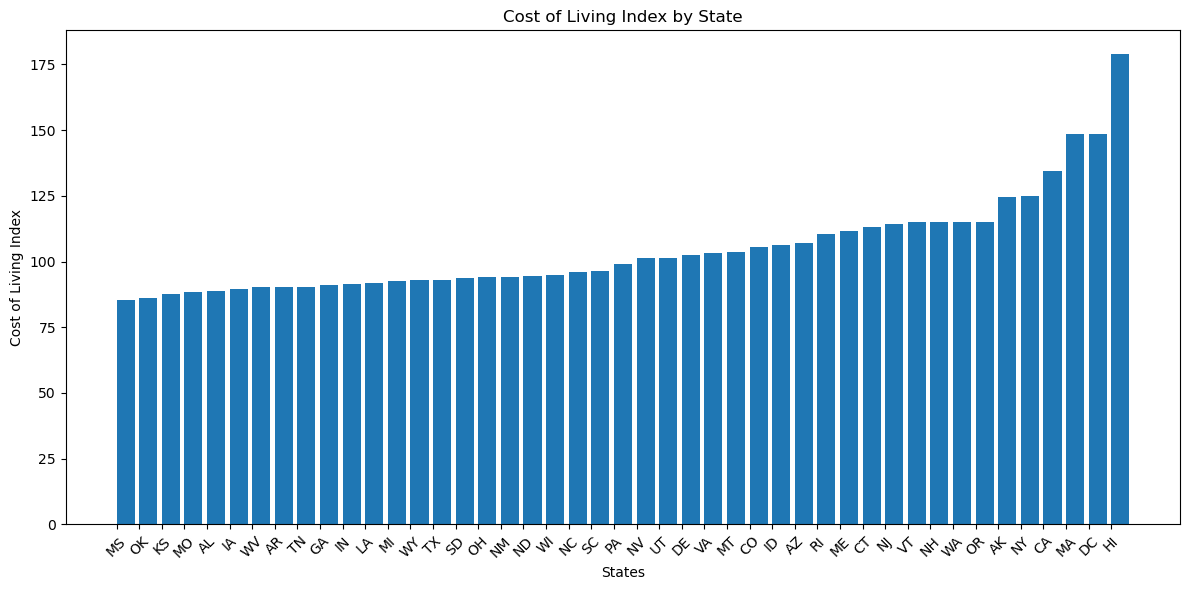

In [73]:
# Sort the data by Cost of Living Index
final_data_sorted_costofliving = final_data.sort_values("Cost of Living Index")
# Generate a bar plot Cost of Living Index by state
plt.figure(figsize=(12,6))
plt.bar(final_data_sorted_costofliving["Abbreviation"],final_data_sorted_costofliving["Cost of Living Index"],align="edge",)

plt.xlabel('States')
plt.ylabel('Cost of Living Index')
plt.title('Cost of Living Index by State')

plt.xticks(rotation=45)
plt.savefig("plots/livingBar.png")
plt.tight_layout()
plt.show()

### Scatterplots

In [74]:
final_data.head()

,Abbreviation,State,"Homicide Rate (per 100,000)",Healthcare Score,Cost of Living Index
0,CA,California,0.313473,56.74,134.5
1,HI,Hawaii,0.416218,78.81,179.0
2,NY,New York,0.625129,32.75,125.1
3,NH,New Hampshire,1.007925,30.47,115.0
4,VT,Vermont,1.239215,56.22,114.9


In [76]:
# Caluculate correlations (r values) for each plot
a=round(st.pearsonr(final_data["Healthcare Score"],final_data["Cost of Living Index"])[0],2)
b=round(st.pearsonr(final_data["Healthcare Score"],final_data["Homicide Rate (per 100,000)"])[0],2)
c=round(st.pearsonr(final_data["Homicide Rate (per 100,000)"],final_data["Cost of Living Index"])[0],2)

#### Healthcare Score vs Cost of Living Index

The correlation between healthcare score and cost of living index is 0.28
the p-value is 0.06019233139081656


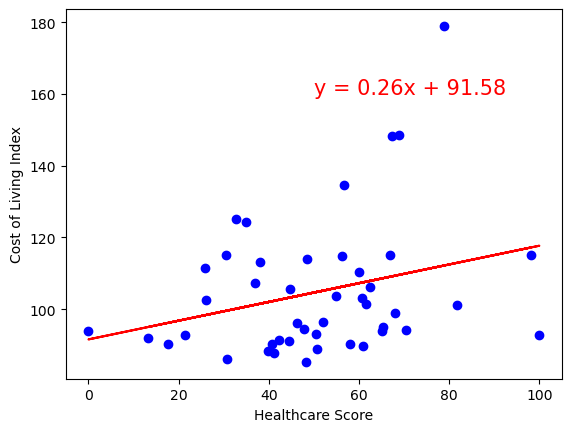

In [78]:
print(f"The correlation between healthcare score and cost of living index is {a}")

(slope,intercept,rvalue,pvalue,stderr) = st.linregress(final_data["Healthcare Score"],final_data["Cost of Living Index"]) 
regress_value=final_data["Healthcare Score"]*slope+intercept
line_eq= "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(final_data["Healthcare Score"],final_data["Cost of Living Index"],marker="o",facecolor="blue")
plt.xlabel("Healthcare Score")
plt.ylabel("Cost of Living Index")
plt.plot(final_data["Healthcare Score"],regress_value,"r-")
plt.annotate(line_eq,(50,160),fontsize=15,color="red")
print(f"the p-value is {pvalue}")
plt.savefig("plots/health_vs_coli.png")
plt.show()

The correlation between healthcare score and homicide rate is 0.06
the p-value is 0.6761979143624888


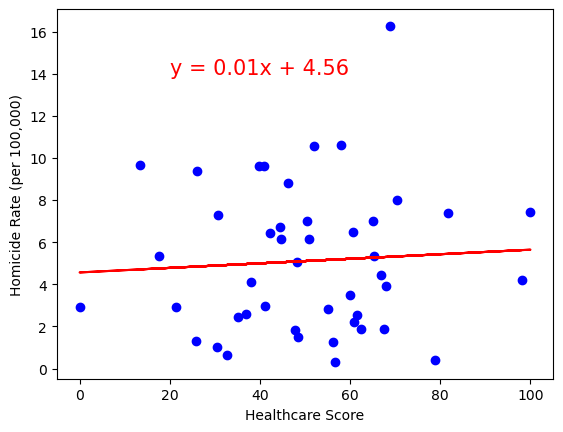

In [80]:
print(f"The correlation between healthcare score and homicide rate is {b}")

(slope,intercept,rvalue,pvalue,stderr) = st.linregress(final_data["Healthcare Score"],final_data["Homicide Rate (per 100,000)"]) 
regress_value=final_data["Healthcare Score"]*slope+intercept
line_eq= "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(final_data["Healthcare Score"],final_data["Homicide Rate (per 100,000)"],marker="o",facecolor="blue")
plt.xlabel("Healthcare Score")
plt.ylabel("Homicide Rate (per 100,000)")
plt.plot(final_data["Healthcare Score"],regress_value,"r-")
plt.annotate(line_eq,(20,14),fontsize=15,color="red")
print(f"the p-value is {pvalue}")
plt.savefig("plots/health_vs_homicide.png")
plt.show()

The correlation between homicide rate and cost of living index is -0.3
the p-value is 0.04627352628453946


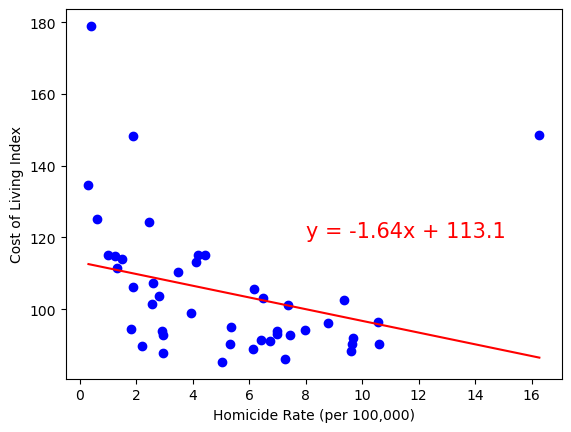

In [82]:
print(f"The correlation between homicide rate and cost of living index is {c}")

(slope,intercept,rvalue,pvalue,stderr) = st.linregress(final_data["Homicide Rate (per 100,000)"],final_data["Cost of Living Index"]) 
regress_value=final_data["Homicide Rate (per 100,000)"]*slope+intercept
line_eq= "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(final_data["Homicide Rate (per 100,000)"],final_data["Cost of Living Index"],marker="o",facecolor="blue")
plt.xlabel("Homicide Rate (per 100,000)")
plt.ylabel("Cost of Living Index")
plt.plot(final_data["Homicide Rate (per 100,000)"],regress_value,"r-")
plt.annotate(line_eq,(8,120),fontsize=15,color="red")
print(f"the p-value is {pvalue}")
plt.savefig("plots/homicide_vs_coli.png")
plt.show()

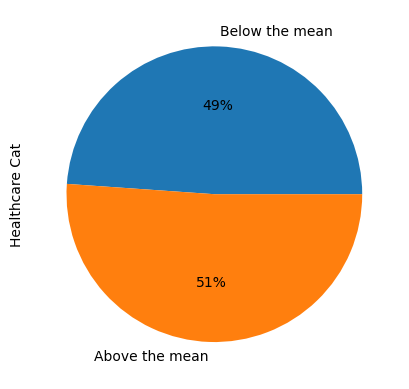

In [84]:
bins_health=[0,final_data["Healthcare Score"].mean(),final_data["Healthcare Score"].max()]
labels=["Below the mean","Above the mean"]

final_data_2=final_data.copy()

final_data_2["Healthcare Cat"]=pd.cut(final_data_2["Healthcare Score"],bins_health,labels=labels,include_lowest=True)
final_data_2.head()


health_graf=final_data_2.groupby("Healthcare Cat")
data_healt_df=health_graf["Healthcare Cat"].count()

pie_chart_health=data_healt_df.plot(kind="pie",y="Healthcare Cat",autopct='%1.0f%%')
plt.savefig("plots/HealthPie.png")
#plt.axis("equal")
plt.show()

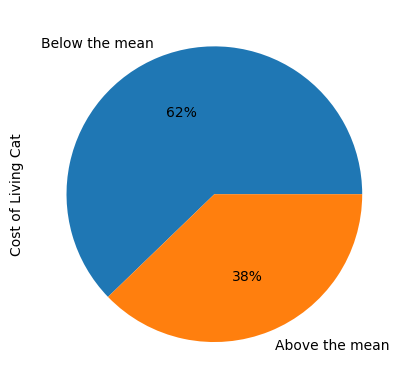

In [88]:
bins_cost=[0,final_data["Cost of Living Index"].mean(),final_data["Cost of Living Index"].max()]
labels=["Below the mean","Above the mean"]

final_data_3=final_data.copy()

final_data_3["Cost of Living Cat"]=pd.cut(final_data_3["Cost of Living Index"],bins_cost, labels=labels,include_lowest=True)
final_data_3.head()


cost_graf=final_data_3.groupby("Cost of Living Cat")
data_cost_df=cost_graf["Cost of Living Cat"].count()

pie_chart_cost=data_cost_df.plot(kind="pie",y="Cost of Living Cat",autopct='%1.0f%%')
plt.savefig("plots/CostPie.png")
#plt.axis("equal")
plt.show()

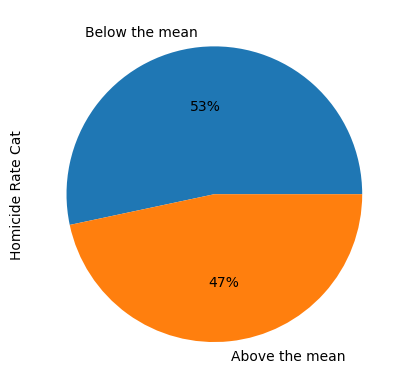

In [89]:
bins_homicide=[0,final_data["Homicide Rate (per 100,000)"].mean(),final_data["Homicide Rate (per 100,000)"].max()]
labels=["Below the mean","Above the mean"]

final_data_4=final_data.copy()

final_data_4["Homicide Rate Cat"]=pd.cut(final_data_4["Homicide Rate (per 100,000)"],bins_homicide, labels=labels,include_lowest=True)


homicide_graf=final_data_4.groupby("Homicide Rate Cat")
data_homicide_df=homicide_graf["Homicide Rate Cat"].count()

pie_chart_homicide=data_homicide_df.plot(kind="pie",y="Homicide Rate Cat",autopct='%1.0f%%')
plt.savefig("plots/HomicidePie.png")
#plt.axis("equal")
plt.show()

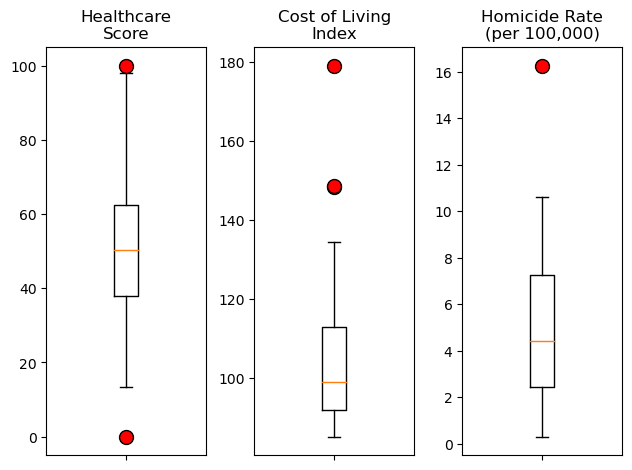

In [111]:

fig1,axs =plt.subplots(1,3)

axs[0].set_title("Healthcare\nScore")
axs[0].boxplot(final_data["Healthcare Score"],flierprops=dict(markerfacecolor="red",markersize=10))
axs[0].set_xticklabels("")

axs[1].set_title("Cost of Living\nIndex")
axs[1].boxplot(final_data["Cost of Living Index"],flierprops=dict(markerfacecolor="red",markersize=10))
axs[1].set_xticklabels("")

axs[2].set_title("Homicide Rate\n(per 100,000)")
axs[2].boxplot(final_data["Homicide Rate (per 100,000)"],flierprops=dict(markerfacecolor="red",markersize=10))
axs[2].set_xticklabels("")

fig1.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
plt.savefig("plots/whiskers.png")